In [1]:
#!pip install lazypredict

In [2]:
#!pip install imbalanced-learn

In [3]:
#import to help with SMOTE import
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [4]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [8]:
#Load Data
survey = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [9]:
survey.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [10]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


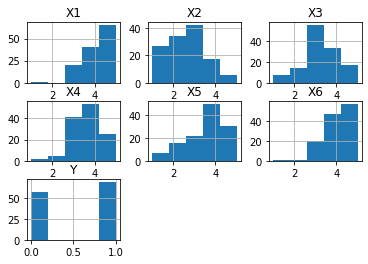

In [11]:
survey.hist(bins=5);

In [12]:
survey.dtypes

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

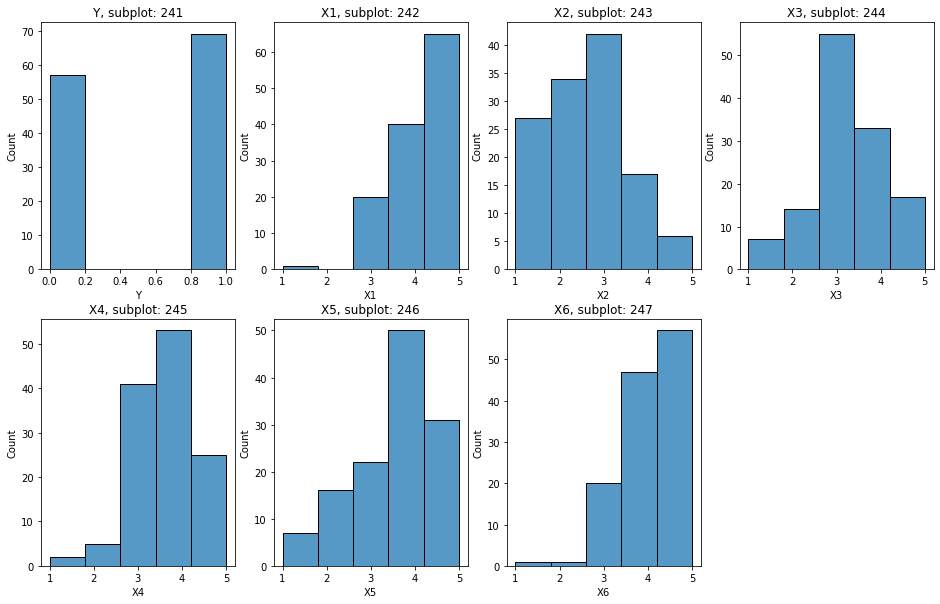

In [13]:
# Let's take a look at the distribution of data

#  Categorical Data
survey_CAT = ['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']

#  Categorical Data
a = 2  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(16,10))

for i in survey_CAT:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    #plt.hist(survey[i], bins=5)
    sns.histplot(survey[i],bins =5)
    c = c + 1

plt.show()

All variables is skewed rigt with the exception of X2. X1 and X6 has almost no 1 or 2 values

Correlation between various features


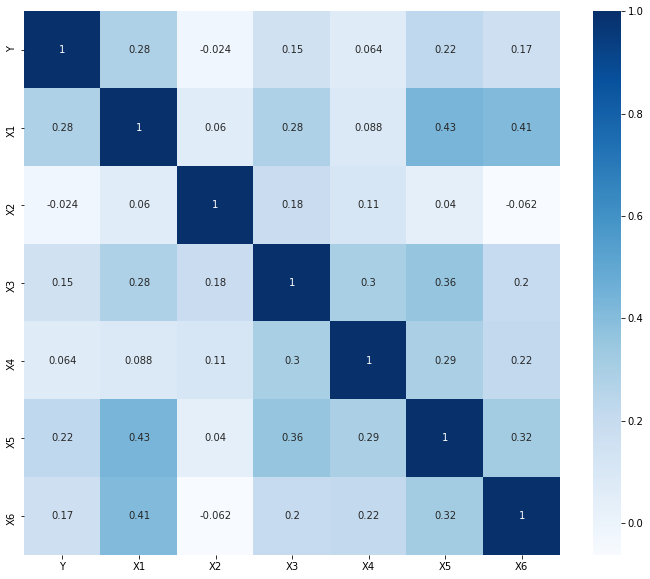

In [14]:
# Let's see if any of the variables 
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(survey.corr(), annot=True,cmap ='Blues')

There is some correlation between X1 and X5 (0.43), X6 (0.41). It's something to pay attention to later.

Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

In [15]:
# Look at the basic statistics of our data and type to make sure we have it cleaned and prepared
df = survey
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


In [16]:
df.dtypes

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

In [17]:
#set randomnesss
seed = 42

In [18]:
#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Y'), 
                                                    df.Y, test_size=0.2, 
                                                    random_state=seed)

Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning. We are going to use Lazy Predict to show us which models we should focus our attention to

In [19]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 23.91it/s]

                               Accuracy  ...  Time Taken
Model                                    ...            
XGBClassifier                      0.65  ...        0.19
ExtraTreeClassifier                0.65  ...        0.01
RandomForestClassifier             0.62  ...        0.20
QuadraticDiscriminantAnalysis      0.62  ...        0.02
LabelPropagation                   0.62  ...        0.03
LGBMClassifier                     0.62  ...        0.03
DecisionTreeClassifier             0.62  ...        0.02
ExtraTreesClassifier               0.62  ...        0.16
BaggingClassifier                  0.62  ...        0.04
LabelSpreading                     0.58  ...        0.02
NearestCentroid                    0.58  ...        0.02
NuSVC                              0.54  ...        0.02
SVC                                0.50  ...        0.03
KNeighborsClassifier               0.50  ...        0.02
AdaBoostClassifier                 0.54  ...        0.12
BernoulliNB                    

In [20]:
#Try Extra Tree Classifier
# define the model
model = GradientBoostingClassifier()
# fit to train data
model.fit(X_train, y_train)
# evaluate the model
score = model.score(X_train, y_train)
print("Score: ", score)
cv_scores = cross_val_score(model, X_train, y_train, cv=10 )
print("CV average score: %.2f" % cv_scores.mean())

Score:  0.89
CV average score: 0.54


In [21]:
#check individual cross-validation scores 
cv_scores

array([0.5, 0.4, 0.7, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.6])

In [22]:
#check model score
model.score(X_test, y_test)

0.6153846153846154

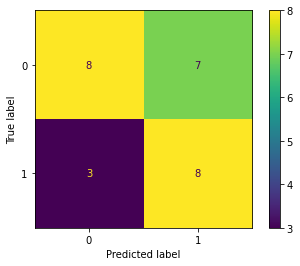

In [23]:
#look at confusion matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test) 

In [24]:
# this model seems to have problem with predicting customers to be happy when they are not
# Trying SMOTE to help with imbalance dataset
from imblearn.over_sampling import SMOTE

In [25]:
# transform the dataset
X = df.drop(columns='Y')
y = df.Y
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [26]:
#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [27]:
#use lazypredict again
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 28.08it/s]

                               Accuracy  ...  Time Taken
Model                                    ...            
LGBMClassifier                     0.71  ...        0.03
SVC                                0.71  ...        0.02
LinearDiscriminantAnalysis         0.64  ...        0.02
XGBClassifier                      0.64  ...        0.03
RidgeClassifierCV                  0.64  ...        0.02
RidgeClassifier                    0.64  ...        0.02
RandomForestClassifier             0.64  ...        0.20
NearestCentroid                    0.64  ...        0.02
LogisticRegression                 0.64  ...        0.04
AdaBoostClassifier                 0.64  ...        0.10
LinearSVC                          0.64  ...        0.05
GaussianNB                         0.64  ...        0.02
BernoulliNB                        0.64  ...        0.02
CalibratedClassifierCV             0.64  ...        0.05
Perceptron                         0.64  ...        0.01
ExtraTreesClassifier           

In [28]:
# Try Bagging Classifier with Decisisions Trees

# initialize the base classifier
base_cls = DecisionTreeClassifier()
  
# no. of base classifier
num_trees = 10
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)

In [29]:
# fit to train data
model.fit(X_train, y_train)
# evaluate the model
score = model.score(X_test, y_test)
print("Score: ", score)
cv_scores = cross_val_score(model, X_train, y_train, cv=5 )
print("CV average score: %.2f" % cv_scores.mean())

Score:  0.5714285714285714
CV average score: 0.66


In [30]:
cv_scores

array([0.64 , 0.72 , 0.6  , 0.72 , 0.625])

In [31]:
model.score(X_test, y_test)

0.5714285714285714

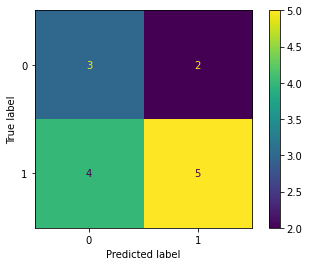

In [32]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test) 

In [33]:
# try SGDC classifier
from sklearn.linear_model import SGDClassifier

In [34]:
model = SGDClassifier(max_iter=100, tol=1e-2, penalty="l2",learning_rate='adaptive',eta0=1)
# fit to train data
model.fit(X_train, y_train)
# evaluate the model
score = model.score(X_train, y_train)
print("Score: ", score)
cv_scores = cross_val_score(model, X_train, y_train, cv=3 )
print("CV average score: %.2f" % cv_scores.mean())

Score:  0.6693548387096774
CV average score: 0.64


In [35]:
cv_scores

array([0.57142857, 0.63414634, 0.70731707])

In [36]:
X_train.shape

(124, 6)

In [37]:
X_test.shape

(14, 6)

In [38]:
#try passive agreesive classifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [39]:
# Creating model
model = PassiveAggressiveClassifier(random_state = seed)
# fit to train data
model.fit(X_train, y_train)
# evaluate the model
score = model.score(X_train, y_train)
print("Score: ", score)
cv_scores = cross_val_score(model, X_train, y_train, cv=3 )
print("CV average score: %.2f" % cv_scores.mean())

Score:  0.5161290322580645
CV average score: 0.52


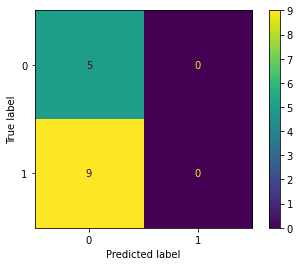

In [40]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test) 

In [41]:
#try stacking classifier
# get a list of models to evaluate
def get_models():
	models = dict()
	models['sgdc'] = SGDClassifier()
	models['extra'] = ExtraTreesClassifier()
	models['grad'] = GradientBoostingClassifier()
	return models

In [42]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
	scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [43]:
# get the models to evaluate
models = get_models()

In [44]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>sgdc 0.330 (0.287)
>extra 0.648 (0.176)
>grad 0.632 (0.167)


In [45]:
# Try Recursive Feature 
from sklearn.feature_selection import RFE
# define the method
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=4)
# fit the model
rfe.fit(X_train, y_train)
# transform the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [46]:
rfe.ranking_

array([1, 1, 1, 3, 1, 2])

In [74]:
#try lazypredict
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, random_state=42)
models,predictions = clf.fit(X_train_rfe, X_test_rfe, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:00<00:00, 30.86it/s]

                               Accuracy  ...  Time Taken
Model                                    ...            
LGBMClassifier                     0.71  ...        0.03
GaussianNB                         0.71  ...        0.01
NearestCentroid                    0.71  ...        0.02
PassiveAggressiveClassifier        0.71  ...        0.01
LinearDiscriminantAnalysis         0.64  ...        0.02
XGBClassifier                      0.64  ...        0.04
SGDClassifier                      0.64  ...        0.02
RidgeClassifierCV                  0.64  ...        0.02
RidgeClassifier                    0.64  ...        0.03
NuSVC                              0.64  ...        0.02
LogisticRegression                 0.64  ...        0.02
BaggingClassifier                  0.64  ...        0.03
LinearSVC                          0.64  ...        0.02
CalibratedClassifierCV             0.64  ...        0.03
BernoulliNB                        0.64  ...        0.02
LabelSpreading                 

In [48]:
pa = clf.models['PassiveAggressiveClassifier']
pa

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Int64Index([0, 1, 2, 3], dtype='int64')),
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                     

In [49]:
pa.score(X_test_rfe, y_test)

0.7142857142857143

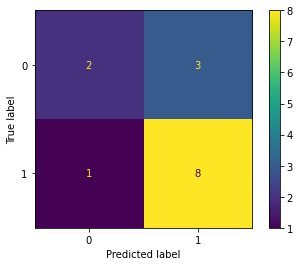

In [50]:
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(pa, X_test_rfe, y_test) 

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [52]:
#try passive agreesive classifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [53]:
# Creating model
model = make_pipeline(SimpleImputer(),StandardScaler(),PassiveAggressiveClassifier())
# fit to train data
model.fit(X_train_rfe, y_train)
# evaluate the model
score = model.score(X_train_rfe, y_train)
print("Score: ", score)
cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=3 )
print("CV average score: %.2f" % cv_scores.mean())

Score:  0.5806451612903226
CV average score: 0.56


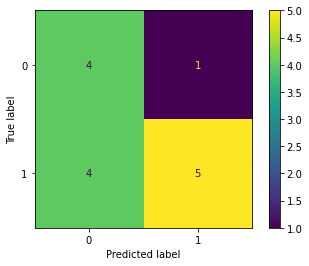

In [54]:
y_pred = model.predict(X_test_rfe)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test_rfe, y_test) 

In [55]:
# Try BernoulliNB
from sklearn.naive_bayes import BernoulliNB

In [56]:
model = make_pipeline(SimpleImputer(),StandardScaler(),BernoulliNB())
# fit to train data
model.fit(X_train_rfe, y_train)
# evaluate the model
score = model.score(X_train_rfe, y_train)
print("Score: ", score)
cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=3 )
print("CV average score: %.2f" % cv_scores.mean())

Score:  0.6693548387096774
CV average score: 0.64


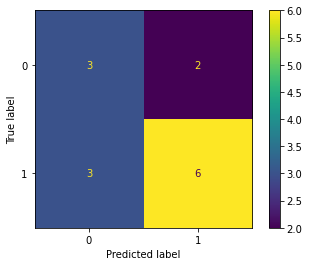

In [57]:
y_pred = model.predict(X_test_rfe)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test_rfe, y_test) 

In [58]:
# Try RidgeClassifierCV
from sklearn.linear_model import RidgeClassifierCV

In [59]:
model = make_pipeline(SimpleImputer(),StandardScaler(),RidgeClassifierCV())
# fit to train data
model.fit(X_train_rfe, y_train)
# evaluate the model
score = model.score(X_train_rfe, y_train)
print("Score: ", score)
cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=3 )
print("CV average score: %.2f" % cv_scores.mean())

Score:  0.6612903225806451
CV average score: 0.61


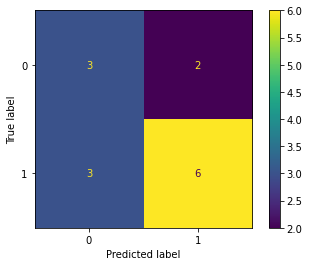

In [60]:
y_pred = model.predict(X_test_rfe)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test_rfe, y_test) 

In [61]:
# Try majority voting
from sklearn.ensemble import VotingClassifier

In [62]:
#define models
clf1 = make_pipeline(SimpleImputer(),StandardScaler(),PassiveAggressiveClassifier())
clf2 = make_pipeline(SimpleImputer(),StandardScaler(),BernoulliNB())
clf3 = make_pipeline(SimpleImputer(),StandardScaler(),RidgeClassifierCV())

In [63]:
# majority - Hard
eclf1 = VotingClassifier(estimators=[('PasAgg', clf1), ('BNB', clf2), ('Ridge', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train_rfe, y_train)
# evaluate the model
scores = evaluate_model(eclf1, X_train_rfe, y_train)
print("Score: ", score)
cv_scores = cross_val_score(eclf1, X_train_rfe, y_train, cv=3 )
print("CV average score: %.2f" % cv_scores.mean())

Score:  0.6612903225806451
CV average score: 0.63


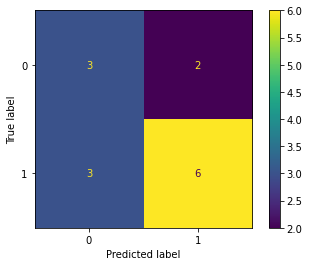

In [64]:
y_pred = eclf1.predict(X_test_rfe)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(eclf1, X_test_rfe, y_test) 

In [65]:
# Try stacking classifier
from sklearn.ensemble import StackingClassifier

In [66]:
estimators = [
              ('PasAgg', clf1), 
              ('BNB', clf2)]

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(random_state=seed))
clf.fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

0.7142857142857143

In [69]:
# evaluate the model
scores = evaluate_model(clf, X_train_rfe, y_train)
print("Score: ", score)
cv_scores = cross_val_score(clf, X_train_rfe, y_train, cv=5 )
print("CV average score: %.2f" % cv_scores.mean())

Score:  0.6612903225806451
CV average score: 0.63


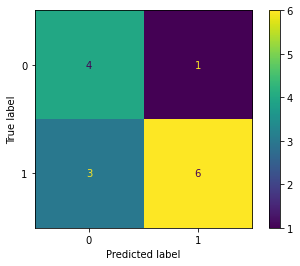

In [70]:
y_pred = clf.predict(X_test_rfe)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test_rfe, y_test) 